###Prepared by: Michael Akinosho
###Date: November 13th, 2021

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [24]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
filename = '/content/drive/Othercomputers/My Laptop/data-science-assignments/06 - Decision Trees Random Forests/Boston_Housing_from_Sklearn.csv'

In [26]:
df = pd.read_csv(filename,header=0)
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [27]:
df.corr()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
CRIM,1.000000,0.420972,-0.219247,0.352734,0.289946,0.455621,-0.388305
NOX,0.420972,1.000000,-0.302188,0.731470,0.188933,0.590879,-0.427321
RM,-0.219247,-0.302188,1.000000,-0.240265,-0.355501,-0.613808,0.695360
AGE,0.352734,0.731470,-0.240265,1.000000,0.261515,0.602339,-0.376955
PTRATIO,0.289946,0.188933,-0.355501,0.261515,1.000000,0.374044,-0.507787
LSTAT,0.455621,0.590879,-0.613808,0.602339,0.374044,1.000000,-0.737663
PRICE,-0.388305,-0.427321,0.695360,-0.376955,-0.507787,-0.737663,1.000000


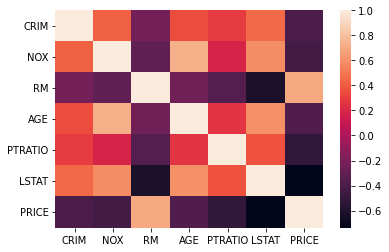

In [28]:
sns_heatmap = sns.heatmap(df.corr())

In [29]:
#Creating the dataframes for X and y
#Keeping the following features for X: RM, PTRATIO, LSTAT
y = df['PRICE']
X = df.drop(columns=['PRICE','CRIM','NOX','AGE'])

In [30]:
#Creating the Train Test Split
#Appears the random state of 42 is causing over-fitting
#Leaving this value based on instructions
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
num_selector = make_column_selector(dtype_include='number')
mean_imputer = SimpleImputer(strategy='mean')
mean_tuple = (mean_imputer,num_selector)

In [32]:
scaler = StandardScaler()
scaler_tuple = (scaler, num_selector)

In [33]:
column_transformer = make_column_transformer(mean_tuple,scaler_tuple)

In [34]:
lin_reg = LinearRegression()

In [35]:
pipe = make_pipeline(column_transformer, lin_reg)

In [ ]:
pipe.fit(X_train,y_train)

In [37]:
#Calculating the score
train_score = pipe.score(X_train,y_train)
print('Train score is: {}'.format(train_score))
test_score = pipe.score(X_test,y_test)
print('Test score is: {}'.format(test_score))
if test_score > train_score:
    print('Appears over-fitting has occurred')

Train score is: 0.6877966145058925
Test score is: 0.6331590458194678


In [38]:
#Calculating the R^2 Score
R2_train_score = r2_score(y_train,pipe.predict(X_train))
print('Train r2 score is: {}'.format(R2_train_score))
R2_test_score = r2_score(y_test,pipe.predict(X_test))
print('Test r2 score is: {}'.format(R2_test_score))
if R2_test_score > R2_train_score:
    print('Appears over-fitting has occurred')

Train r2 score is: 0.6877966145058925
Test r2 score is: 0.6331590458194678


In [39]:
#Calculating the mean absolute error
train_MAE = mean_absolute_error(y_train,pipe.predict(X_train))
print('Train mean absolute error is: {}'.format(train_MAE))
test_MAE = mean_absolute_error(y_test,pipe.predict(X_test))
print('Test mean absolute error is: {}'.format(test_MAE))
if test_MAE > train_MAE:
    print('Appears over-fitting has occurred')

Train mean absolute error is: 3.714054057158006
Test mean absolute error is: 3.391844829381399


In [40]:
#Calculating the mean squared error
train_MSE  = mean_squared_error(y_train, pipe.predict(X_train))
print('Train mean squared error is: {}'.format(train_MSE))
test_MSE = mean_squared_error(y_test, pipe.predict(X_test))
print('Test mean squared error is: {}'.format(test_MSE))
if test_MSE > train_MSE:
    print('Appears over-fitting has occurred')

Train mean squared error is: 27.68673681796949
Test mean squared error is: 25.688824196675956


In [41]:
#Calculating the Root mean squared error
train_RMSE = np.sqrt(train_MSE)
print('Train root mean squared error is: {}'.format(train_RMSE))
test_RMSE = np.sqrt(test_MSE)
print('Test root mean squared error is: {}'.format(test_RMSE))


Train root mean squared error is: 5.261818774717492
Test root mean squared error is: 5.068414367104959
